In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import pickle
from preprocessing import drop_columns, custom_mapping


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [4]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Исследовательский анализ

### Gender

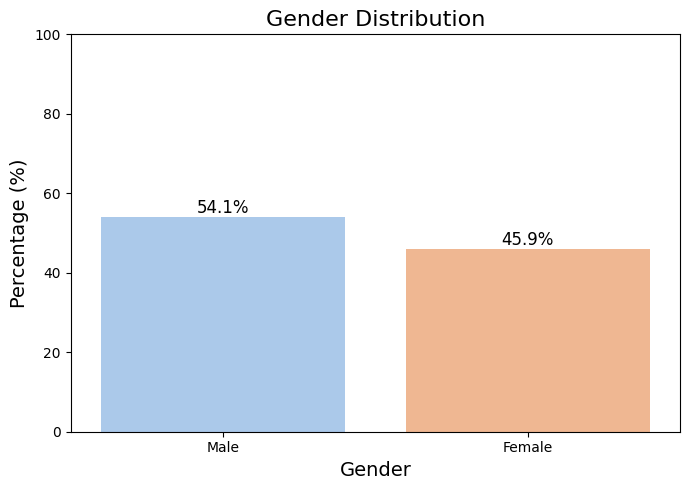

In [5]:
gender_counts = df['Gender'].value_counts(normalize=True) * 100

# Преобразуем Series в DataFrame для удобства
gender_df = gender_counts.reset_index()
gender_df.columns = ['Gender', 'Percentage']

# Строим график
plt.figure(figsize=(7, 5))
barplot = sns.barplot(x='Gender', y='Percentage', data=gender_df, hue='Gender', palette='pastel', legend=False)

# Добавляем подписи с процентами на каждый столбец
for index, row in gender_df.iterrows():
    barplot.text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%",
                 ha='center', fontsize=12, color='black')

# Настройка графика
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)  # Устанавливаем пределы для оси Y
plt.tight_layout()

# Показываем график
plt.show()

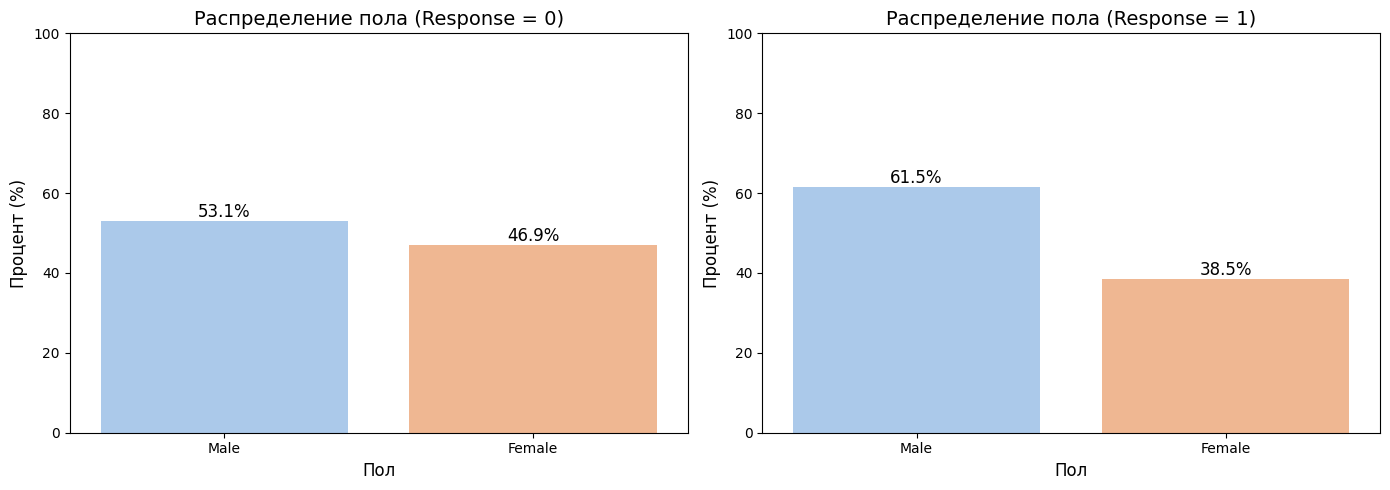

In [6]:
# Разделяем данные по значению Response
df_0 = df[df['Response'] == 0]
df_1 = df[df['Response'] == 1]

# Функция для расчета процентного распределения пола
def gender_distribution(df):
    gender_counts = df['Gender'].value_counts(normalize=True) * 100
    gender_df = gender_counts.reset_index()
    gender_df.columns = ['Gender', 'Percentage']
    return gender_df

# Получаем данные
gender_df_0 = gender_distribution(df_0)
gender_df_1 = gender_distribution(df_1)

# Создаем фигуру и оси
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График для Response = 0
sns.barplot(x='Gender', y='Percentage', data=gender_df_0, hue='Gender', palette='pastel', legend=False, ax=axes[0])
axes[0].set_title('Распределение пола (Response = 0)', fontsize=14)
axes[0].set_xlabel('Пол', fontsize=12)
axes[0].set_ylabel('Процент (%)', fontsize=12)
axes[0].set_ylim(0, 100)

# Добавляем подписи
for index, row in gender_df_0.iterrows():
    axes[0].text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%",
                 ha='center', fontsize=12, color='black')

# График для Response = 1
sns.barplot(x='Gender', y='Percentage', data=gender_df_1, hue='Gender', palette='pastel', legend=False, ax=axes[1])
axes[1].set_title('Распределение пола (Response = 1)', fontsize=14)
axes[1].set_xlabel('Пол', fontsize=12)
axes[1].set_ylabel('Процент (%)', fontsize=12)
axes[1].set_ylim(0, 100)

# Добавляем подписи
for index, row in gender_df_1.iterrows():
    axes[1].text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%",
                 ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

Распределение немного отличается, поэтому оставляем.

### Age

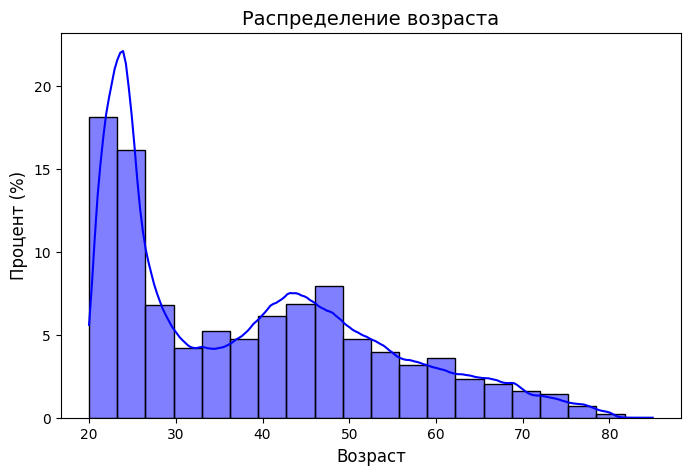

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='blue', stat="percent")
plt.title('Распределение возраста', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Процент (%)', fontsize=12)
plt.show()

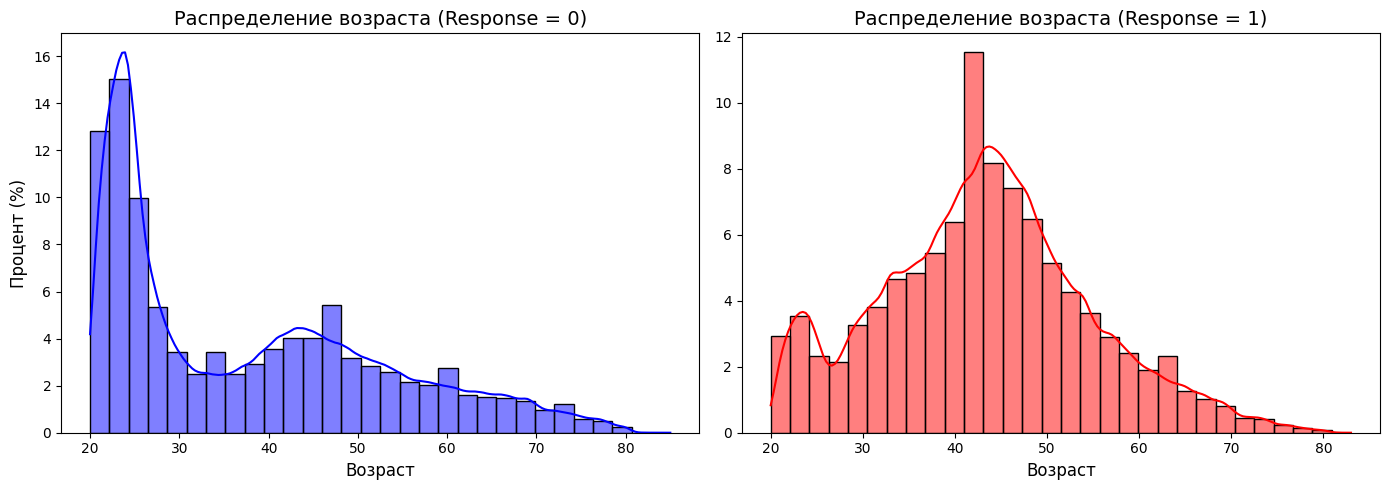

In [8]:
# Разделяем данные по значению Response
df_0 = df[df['Response'] == 0]
df_1 = df[df['Response'] == 1]

# Создаем фигуру и оси
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма возраста для Response = 0
sns.histplot(df_0['Age'], kde=True, bins=30, color='blue', stat="percent", ax=axes[0])
axes[0].set_title('Распределение возраста (Response = 0)', fontsize=14)
axes[0].set_xlabel('Возраст', fontsize=12)
axes[0].set_ylabel('Процент (%)', fontsize=12)

# Гистограмма возраста для Response = 1
sns.histplot(df_1['Age'], kde=True, bins=30, color='red', stat="percent", ax=axes[1])
axes[1].set_title('Распределение возраста (Response = 1)', fontsize=14)
axes[1].set_xlabel('Возраст', fontsize=12)
axes[1].set_ylabel('', fontsize=1)

plt.tight_layout()
plt.show()

Можно видеть, что для разных response рапределения отличаются, поэтому признак имеет смысл оставить.

# Driving_License

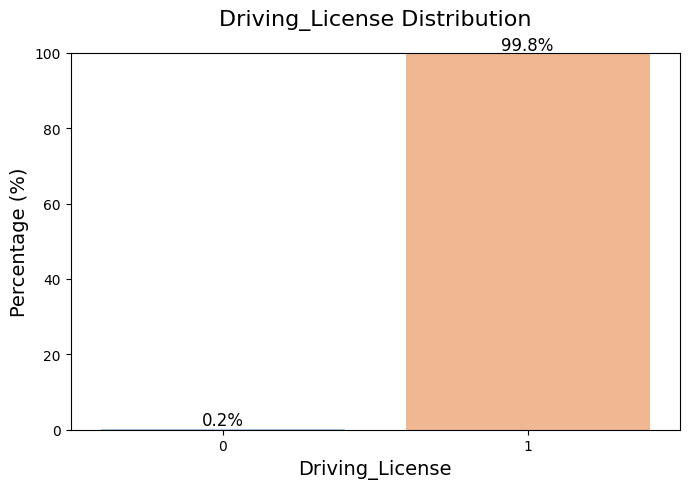

In [9]:
Driving_License_counts = df['Driving_License'].value_counts(normalize=True) * 100

# Преобразуем Series в DataFrame для удобства
Driving_License_df = Driving_License_counts.reset_index()
Driving_License_df.columns = ['Driving_License', 'Percentage']
Driving_License_df = Driving_License_df.sort_values('Driving_License').reset_index()
# Строим график
plt.figure(figsize=(7, 5))
barplot = sns.barplot(x='Driving_License', y='Percentage', data=Driving_License_df, hue='Driving_License', palette='pastel', legend=False)

# Добавляем подписи с процентами на каждый столбец
for index, row in Driving_License_df.iterrows():
    barplot.text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%",
                 ha='center', fontsize=12, color='black')

# Настройка графика
plt.title('Driving_License Distribution', fontsize=16, pad=20)
plt.xlabel('Driving_License', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)  # Устанавливаем пределы для оси Y
plt.tight_layout()

# Показываем график
plt.show()

Почти все значение признака равны 1, поэтому его следует удалить.

# Previously_Insured

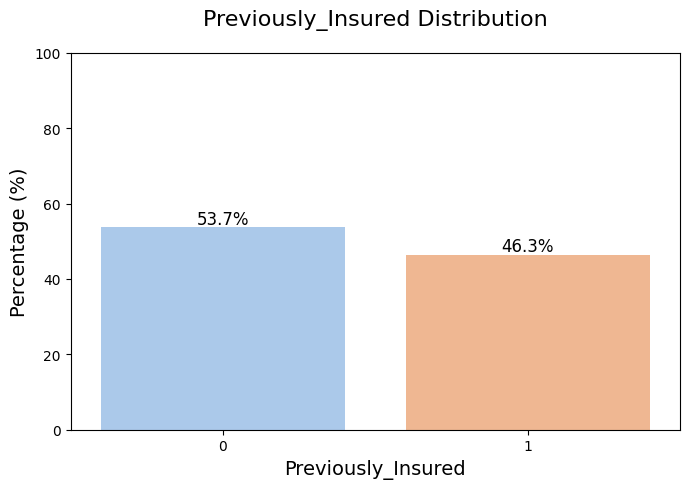

In [11]:
Driving_License_counts = df['Previously_Insured'].value_counts(normalize=True) * 100

# Преобразуем Series в DataFrame для удобства
Driving_License_df = Driving_License_counts.reset_index()
Driving_License_df.columns = ['Previously_Insured', 'Percentage']
Driving_License_df = Driving_License_df.sort_values('Previously_Insured').reset_index()
# Строим график
plt.figure(figsize=(7, 5))
barplot = sns.barplot(x='Previously_Insured', y='Percentage', data=Driving_License_df, hue='Previously_Insured', palette='pastel', legend=False)

# Добавляем подписи с процентами на каждый столбец
for index, row in Driving_License_df.iterrows():
    barplot.text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%",
                 ha='center', fontsize=12, color='black')

# Настройка графика
plt.title('Previously_Insured Distribution', fontsize=16, pad=20)
plt.xlabel('Previously_Insured', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)  # Устанавливаем пределы для оси Y
plt.tight_layout()

# Показываем график
plt.show()

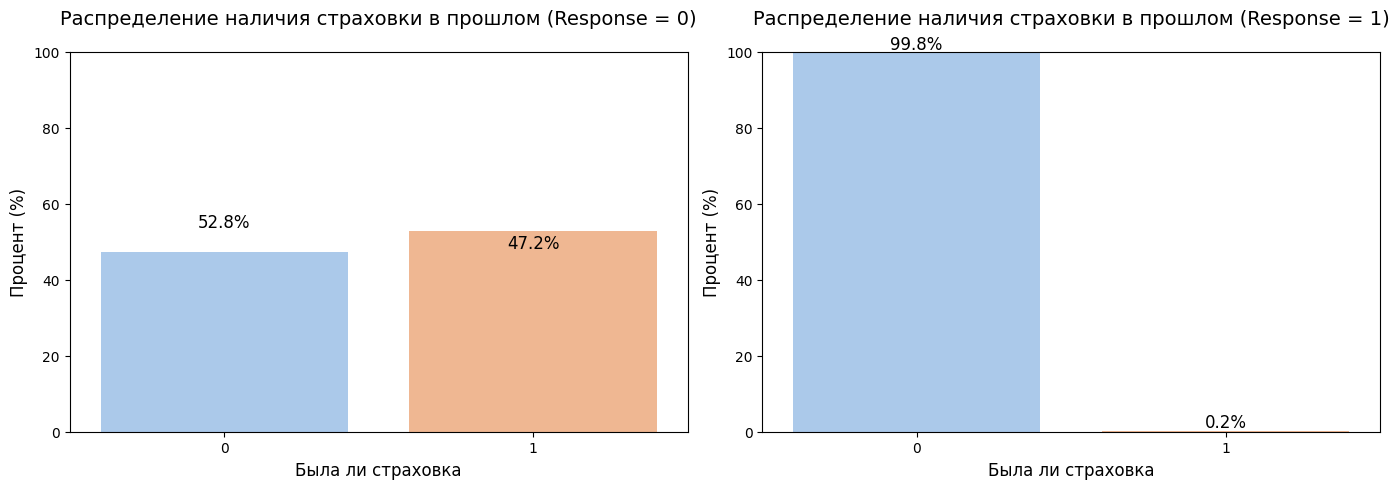

In [12]:
# Разделяем данные по значению Response
df_0 = df[df['Response'] == 0]
df_1 = df[df['Response'] == 1]

# Функция для расчета процентного распределения пола
def Previously_Insured_distribution(df):
    Previously_Insured_counts = df['Previously_Insured'].value_counts(normalize=True) * 100
    Previously_Insured_df = Previously_Insured_counts.reset_index()
    Previously_Insured_df.columns = ['Previously_Insured', 'Percentage']
    return Previously_Insured_df

# Получаем данные
Previously_Insured_df_0 = Previously_Insured_distribution(df_0)
Previously_Insured_df_1 = Previously_Insured_distribution(df_1)

# Создаем фигуру и оси
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График для Response = 0
sns.barplot(x='Previously_Insured', y='Percentage', data=Previously_Insured_df_0, hue='Previously_Insured', palette='pastel', legend=False, ax=axes[0])
axes[0].set_title('Распределение наличия страховки в прошлом (Response = 0)', fontsize=14, pad=20)
axes[0].set_xlabel('Была ли страховка', fontsize=12)
axes[0].set_ylabel('Процент (%)', fontsize=12)
axes[0].set_ylim(0, 100)

# Добавляем подписи
for index, row in Previously_Insured_df_0.iterrows():
    axes[0].text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%",
                 ha='center', fontsize=12, color='black')

# График для Response = 1
sns.barplot(x='Previously_Insured', y='Percentage', data=Previously_Insured_df_1, hue='Previously_Insured', palette='pastel', legend=False, ax=axes[1])
axes[1].set_title('Распределение наличия страховки в прошлом (Response = 1)', fontsize=14, pad=20)
axes[1].set_xlabel('Была ли страховка', fontsize=12)
axes[1].set_ylabel('Процент (%)', fontsize=12)
axes[1].set_ylim(0, 100)

# Добавляем подписи
for index, row in Previously_Insured_df_1.iterrows():
    axes[1].text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%",
                 ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

Видно, что почти все, кто соглашался на страховку, не имел страховки в прошлом, поэтому признак стоит оставить.

# Vehicle_Age

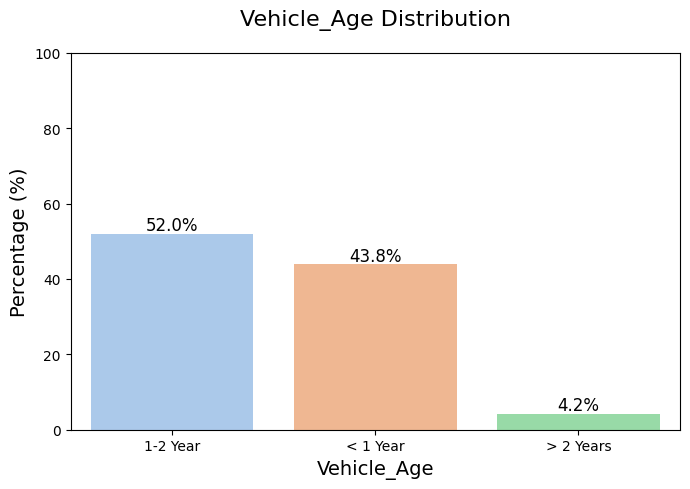

In [13]:
Driving_License_counts = df['Vehicle_Age'].value_counts(normalize=True) * 100

# Преобразуем Series в DataFrame для удобства
Driving_License_df = Driving_License_counts.reset_index()
Driving_License_df.columns = ['Vehicle_Age', 'Percentage']
Driving_License_df = Driving_License_df.sort_values('Vehicle_Age').reset_index()
# Строим график
plt.figure(figsize=(7, 5))
barplot = sns.barplot(x='Vehicle_Age', y='Percentage', data=Driving_License_df, hue='Vehicle_Age', palette='pastel', legend=False)

# Добавляем подписи с процентами на каждый столбец
for index, row in Driving_License_df.iterrows():
    barplot.text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%",
                 ha='center', fontsize=12, color='black')

# Настройка графика
plt.title('Vehicle_Age Distribution', fontsize=16, pad=20)
plt.xlabel('Vehicle_Age', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)  # Устанавливаем пределы для оси Y
plt.tight_layout()

# Показываем график
plt.show()

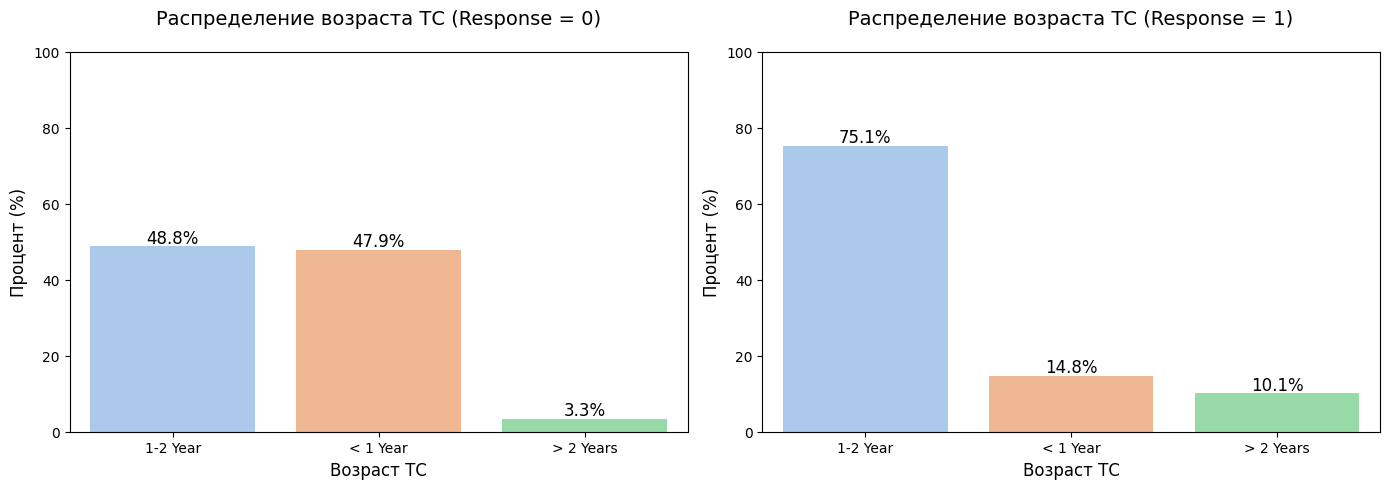

In [14]:
# Разделяем данные по значению Response
df_0 = df[df['Response'] == 0]
df_1 = df[df['Response'] == 1]

# Функция для расчета процентного распределения пола
def Vehicle_Age_distribution(df):
    Vehicle_Age_counts = df['Vehicle_Age'].value_counts(normalize=True) * 100
    Vehicle_Age_df = Vehicle_Age_counts.reset_index()
    Vehicle_Age_df.columns = ['Vehicle_Age', 'Percentage']
    return Vehicle_Age_df

# Получаем данные
Vehicle_Age_df_0 = Vehicle_Age_distribution(df_0)
Vehicle_Age_df_1 = Vehicle_Age_distribution(df_1)

# Создаем фигуру и оси
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График для Response = 0
sns.barplot(x='Vehicle_Age', y='Percentage', data=Vehicle_Age_df_0, hue='Vehicle_Age', palette='pastel', legend=False, ax=axes[0])
axes[0].set_title('Распределение возраста ТС (Response = 0)', fontsize=14, pad=20)
axes[0].set_xlabel('Возраст ТС', fontsize=12)
axes[0].set_ylabel('Процент (%)', fontsize=12)
axes[0].set_ylim(0, 100)

# Добавляем подписи
for index, row in Vehicle_Age_df_0.iterrows():
    axes[0].text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%",
                 ha='center', fontsize=12, color='black')

# График для Response = 1
sns.barplot(x='Vehicle_Age', y='Percentage', data=Vehicle_Age_df_1, hue='Vehicle_Age', palette='pastel', legend=False, ax=axes[1])
axes[1].set_title('Распределение возраста ТС (Response = 1)', fontsize=14, pad=20)
axes[1].set_xlabel('Возраст ТС', fontsize=12)
axes[1].set_ylabel('Процент (%)', fontsize=12)
axes[1].set_ylim(0, 100)

# Добавляем подписи
for index, row in Vehicle_Age_df_1.iterrows():
    axes[1].text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%",
                 ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

In [15]:
# Вычисляем корреляцию
vehicle_age_df = df[['Vehicle_Age', 'Response']].copy()
vehicle_age_df = pd.get_dummies(vehicle_age_df, columns=['Vehicle_Age'])
corr_matrix_vehicle_age = vehicle_age_df.corr()
# Создаем тепловую карту (heatmap)
fig = ff.create_annotated_heatmap(
    z=corr_matrix_vehicle_age.values,
    x=list(corr_matrix_vehicle_age.columns),
    y=list(corr_matrix_vehicle_age.index),
    colorscale='Viridis',  # Цветовая схема
    annotation_text=corr_matrix_vehicle_age.round(2).values,  # Округляем до 2 знаков
    showscale=True
)
# Отображаем график
fig.show()

Так как данных об автомобилях с возрастом более 2 лет мало, то объединим эти данные с автомобилями возраста 1-2 года. Затем заменим значения признака на 0 и 1

# Vehicle_Damage

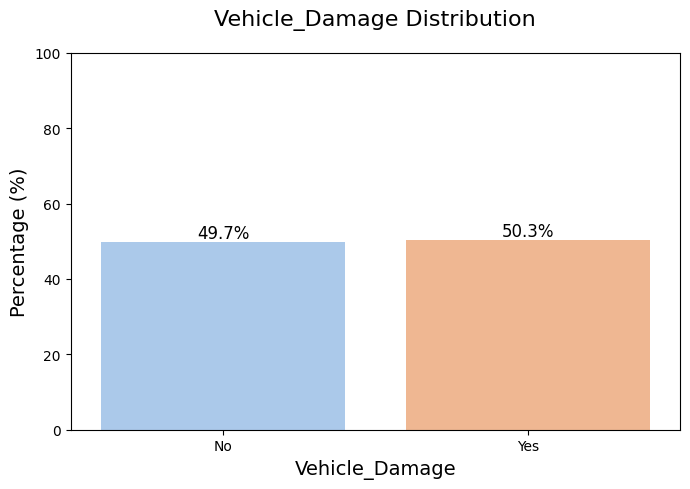

In [16]:
Driving_License_counts = df['Vehicle_Damage'].value_counts(normalize=True) * 100

# Преобразуем Series в DataFrame для удобства
Driving_License_df = Driving_License_counts.reset_index()
Driving_License_df.columns = ['Vehicle_Damage', 'Percentage']
Driving_License_df = Driving_License_df.sort_values('Vehicle_Damage').reset_index()
# Строим график
plt.figure(figsize=(7, 5))
barplot = sns.barplot(x='Vehicle_Damage', y='Percentage', data=Driving_License_df, hue='Vehicle_Damage', palette='pastel', legend=False)

# Добавляем подписи с процентами на каждый столбец
for index, row in Driving_License_df.iterrows():
    barplot.text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%",
                 ha='center', fontsize=12, color='black')

# Настройка графика
plt.title('Vehicle_Damage Distribution', fontsize=16, pad=20)
plt.xlabel('Vehicle_Damage', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)  # Устанавливаем пределы для оси Y
plt.tight_layout()

# Показываем график
plt.show()

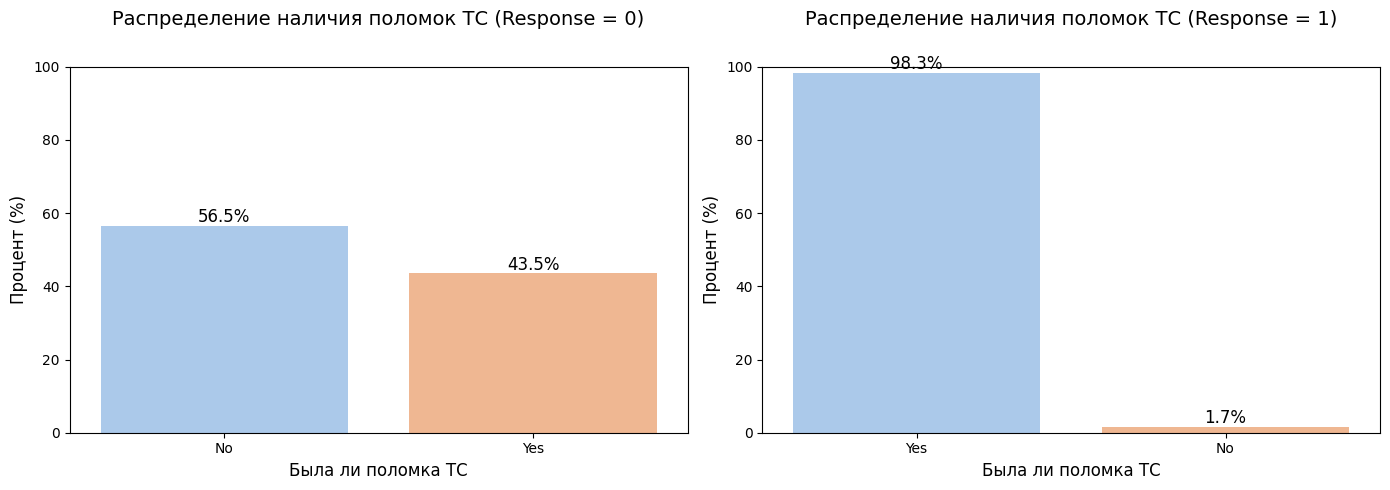

In [17]:
# Разделяем данные по значению Response
df_0 = df[df['Response'] == 0]
df_1 = df[df['Response'] == 1]

# Функция для расчета процентного распределения пола
def Vehicle_Damage_distribution(df):
    Vehicle_Damage_counts = df['Vehicle_Damage'].value_counts(normalize=True) * 100
    Vehicle_Damage_df = Vehicle_Damage_counts.reset_index()
    Vehicle_Damage_df.columns = ['Vehicle_Damage', 'Percentage']
    return Vehicle_Damage_df

# Получаем данные
Vehicle_Damage_df_0 = Vehicle_Damage_distribution(df_0)
Vehicle_Damage_df_1 = Vehicle_Damage_distribution(df_1)

# Создаем фигуру и оси
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График для Response = 0
sns.barplot(x='Vehicle_Damage', y='Percentage', data=Vehicle_Damage_df_0, hue='Vehicle_Damage', palette='pastel', legend=False, ax=axes[0])
axes[0].set_title('Распределение наличия поломок ТС (Response = 0)', fontsize=14, pad=30)
axes[0].set_xlabel('Была ли поломка ТС', fontsize=12)
axes[0].set_ylabel('Процент (%)', fontsize=12)
axes[0].set_ylim(0, 100)

# Добавляем подписи
for index, row in Vehicle_Damage_df_0.iterrows():
    axes[0].text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%",
                 ha='center', fontsize=12, color='black')

# График для Response = 1
sns.barplot(x='Vehicle_Damage', y='Percentage', data=Vehicle_Damage_df_1, hue='Vehicle_Damage', palette='pastel', legend=False, ax=axes[1])
axes[1].set_title('Распределение наличия поломок ТС (Response = 1)', fontsize=14, pad=30)
axes[1].set_xlabel('Была ли поломка ТС', fontsize=12)
axes[1].set_ylabel('Процент (%)', fontsize=12)
axes[1].set_ylim(0, 100)

# Добавляем подписи
for index, row in Vehicle_Damage_df_1.iterrows():
    axes[1].text(index, row['Percentage'] + 1, f"{row['Percentage']:.1f}%",
                 ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

Различия в распределении признака говорит о его полезности

# Annual_Premium

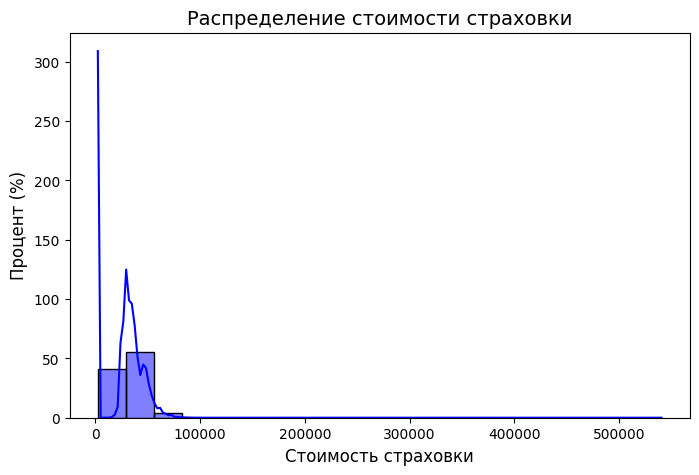

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Annual_Premium'], kde=True, bins=20, color='blue', stat="percent")
plt.title('Распределение стоимости страховки', fontsize=14)
plt.xlabel('Стоимость страховки', fontsize=12)
plt.ylabel('Процент (%)', fontsize=12)
plt.show()

C:\Users\nosow\AppData\Local\Temp\ipykernel_4072\1278261858.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\nosow\AppData\Local\Temp\ipykernel_4072\1278261858.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



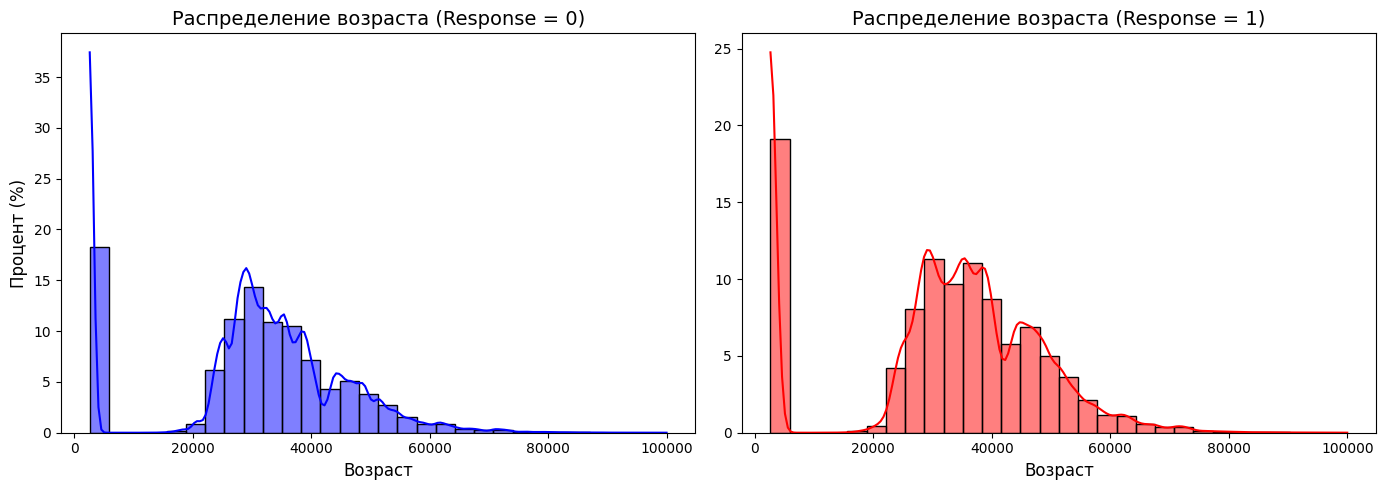

In [19]:
# Разделяем данные по значению Response
df_0 = df[df['Response'] == 0]
df_1 = df[df['Response'] == 1]
# Создаем фигуру и оси
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма возраста для Response = 0
sns.histplot(df_0['Annual_Premium'], kde=True, bins=30, color='blue', stat="percent", ax=axes[0])
axes[0].set_title('Распределение возраста (Response = 0)', fontsize=14)
axes[0].set_xlabel('Возраст', fontsize=12)
axes[0].set_ylabel('Процент (%)', fontsize=12)

# Гистограмма возраста для Response = 1
sns.histplot(df_1['Annual_Premium'], kde=True, bins=30, color='red', stat="percent", ax=axes[1])
axes[1].set_title('Распределение возраста (Response = 1)', fontsize=14)
axes[1].set_xlabel('Возраст', fontsize=12)
axes[1].set_ylabel('', fontsize=1)

plt.tight_layout()
plt.show()

# Vintage

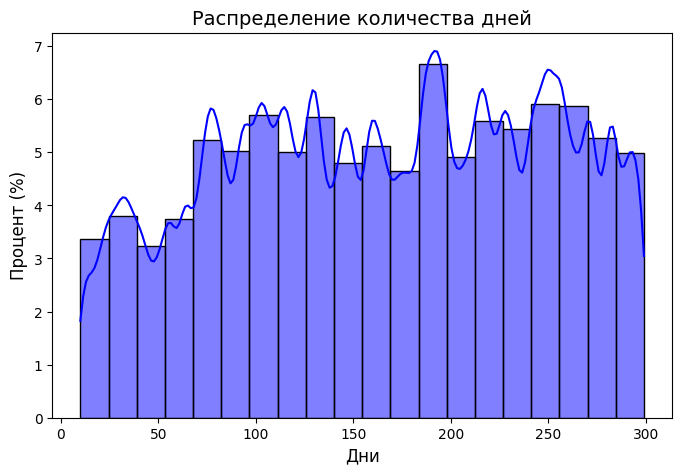

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Vintage'], kde=True, bins=20, color='blue', stat="percent")
plt.title('Распределение количества дней', fontsize=14)
plt.xlabel('Дни', fontsize=12)
plt.ylabel('Процент (%)', fontsize=12)
plt.show()

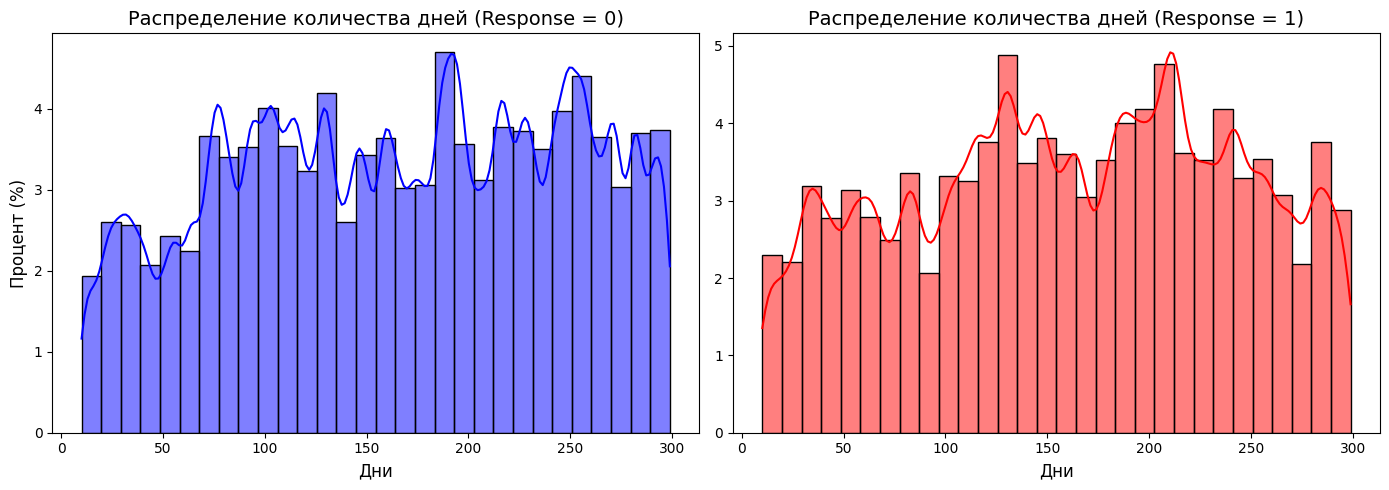

In [21]:
# Разделяем данные по значению Response
df_0 = df[df['Response'] == 0]
df_1 = df[df['Response'] == 1]
# Создаем фигуру и оси
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма возраста для Response = 0
sns.histplot(df_0['Vintage'], kde=True, bins=30, color='blue', stat="percent", ax=axes[0])
axes[0].set_title('Распределение количества дней (Response = 0)', fontsize=14)
axes[0].set_xlabel('Дни', fontsize=12)
axes[0].set_ylabel('Процент (%)', fontsize=12)

# Гистограмма возраста для Response = 1
sns.histplot(df_1['Vintage'], kde=True, bins=30, color='red', stat="percent", ax=axes[1])
axes[1].set_title('Распределение количества дней (Response = 1)', fontsize=14)
axes[1].set_xlabel('Дни', fontsize=12)
axes[1].set_ylabel('', fontsize=1)

plt.tight_layout()
plt.show()

Кажется, что признак не даёт поезой информации.

In [23]:
# Вычисляем корреляцию
corr_matrix = df.corr()

# Создаем тепловую карту (heatmap)
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    colorscale='Viridis',  # Цветовая схема
    annotation_text=corr_matrix.round(2).values,  # Округляем до 2 знаков
    showscale=True
)
# Отображаем график
fig.show()

## Построение модели

In [3]:
numerical_features = ["Age", 'Annual_Premium']

dropper = FunctionTransformer(drop_columns)
mapper = FunctionTransformer(custom_mapping)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

In [19]:
data = df.copy()

In [ ]:
# Разделение на признаки (X) и целевую переменную (y)
X = data.drop('Response', axis=1)
y = data['Response']

max_train_size = 5_000_000
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=max_train_size, shuffle=False, random_state=42)

In [ ]:
X_train_grid = custom_mapping(X_train)
X_train_grid = drop_columns(X_train_grid)
X_train_grid = preprocessor.fit_transform(X_train_grid)

param_grid = {
    'scale_pos_weight': [2.5, 3, 3.5],
    # 'learning_rate': [0.01, 0.1],
    # 'subsample': [0.8, 1.0],
    # 'colsample_bytree': [0.8, 1.0],
    # 'gamma': [0, 0.1, 0.2]
}

grid = GridSearchCV(
    XGBClassifier(objective='binary:logistic', n_estimators=1000, eval_metric='aucpr'),
    param_grid,
    cv=5,#StratifiedKFold(n_splits=3),
    scoring='f1',
)

grid.fit(X_train_grid, y_train)
print("Лучшие параметры:", grid.best_params_)
print("Лучший F1:", grid.best_score_)

In [59]:
model_pipeline = Pipeline(steps=[
    ('dropper', dropper),
    ('mapper', mapper),
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
                      scale_pos_weight=3,
                      objective='binary:logistic',
                      eval_metric='aucpr',
                      learning_rate=0.1,
                      max_depth=3,
                      subsample=0.95,
                      n_estimators=200,
                      random_state=42,
                      n_jobs=-1)),
])

In [60]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('dropper',
                 FunctionTransformer(func=<function drop_columns at 0x000001D44B261EE0>)),
                ('mapper',
                 FunctionTransformer(func=<function custom_mapping at 0x000001D44B261E40>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Annual_Premium'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=Non...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [55]:
with open('model_XGB.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)

# Test API

In [17]:

data = pd.read_csv('train.csv')

X = data.drop('Response', axis=1)
y = data['Response']

max_train_size = 5_000_000
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=max_train_size, shuffle=False, random_state=42)

In [43]:
import requests

def predict_model(data):
    url = 'http://127.0.0.1:5000/predict_model'
    print(data)

    # Отправка POST-запроса с данными в формате форм-данных
    response = requests.post(url, json=data)

    # Проверка статуса ответа
    if response.status_code == 200:
        return response.json()
    else:
        return {"error": f"Request failed with status code {response.status_code}"}


prediction = predict_model(X_test.iloc[24].to_dict())
print(prediction)
# for i in range(len(X_test)):
#     if int(predict_model(X_test.iloc[i].to_dict())['prediction'][-1]) == 1:
#         print(i)

{'id': 5000024, 'Gender': 'Male', 'Age': 61, 'Driving_License': 1, 'Region_Code': 36.0, 'Previously_Insured': 0, 'Vehicle_Age': '1-2 Year', 'Vehicle_Damage': 'Yes', 'Annual_Premium': 29063.0, 'Policy_Sales_Channel': 26.0, 'Vintage': 267}
{'prediction': 'Response = 0'}


In [ ]:
import json

data = X_test.iloc[0].to_dict()
print("Отправляемые данные:", json.dumps(data, indent=2))

Отправляемые данные: {
  "id": 5000000,
  "Gender": "Female",
  "Age": 44,
  "Driving_License": 1,
  "Region_Code": 36.0,
  "Previously_Insured": 1,
  "Vehicle_Age": "1-2 Year",
  "Vehicle_Damage": "No",
  "Annual_Premium": 2630.0,
  "Policy_Sales_Channel": 152.0,
  "Vintage": 182
}


In [ ]:
# Загрузка модели из файла pickle
with open('model_XGB.pkl', 'rb') as f:
    model = pickle.load(f)